In [9]:
from face_alignment import FaceAlignment, LandmarksType

from loreal_poc.dataloaders.loaders import DataLoader300W
from loreal_poc.dataloaders.wrappers import (
    CroppedDataLoader,
    CachedDataLoader,
    BlurDataLoader,
    ResizedDataLoader,
    ColorDataLoader,
)
from loreal_poc.marks.facial_parts import FacialParts
from loreal_poc.visualisation.draw import draw_marks
from loreal_poc.tests.performance import NMEMean
from loreal_poc.models.wrappers import FaceAlignmentWrapper, OpenCVWrapper
from loreal_poc.tests.base import Test, TestDiff
import numpy as np

In [2]:
# model = FaceAlignmentWrapper(model=FaceAlignment(LandmarksType.TWO_D, device='cpu', flip_input=False))
model = OpenCVWrapper()
dl = DataLoader300W(dir_path="300W/sample", batch_size=1)

loading data from : lbfmodel.yaml


### Blurring

In [ ]:
blurred_dl = BlurDataLoader(dl, kernel_size=(15, 15), sigma=(9, 9))
# cropped_dl = CroppedDataLoader(dl, part=FacialParts.RIGHT_HALF.value)

original_image, marks, _ = dl[4]
blurred_image, _, _ = blurred_dl[4]

original_predictions = model.predict_image(original_image)
blurred_predictions = model.predict_image(blurred_image)
draw_marks(blurred_image, [marks, original_predictions, blurred_predictions], ["green", "red", "magenta"])

In [ ]:
test_result = TestDiff(metric=NMEMean, threshold=1).run(model, blurred_dl, dataloader_ref=dl)
test_result

### Resizing

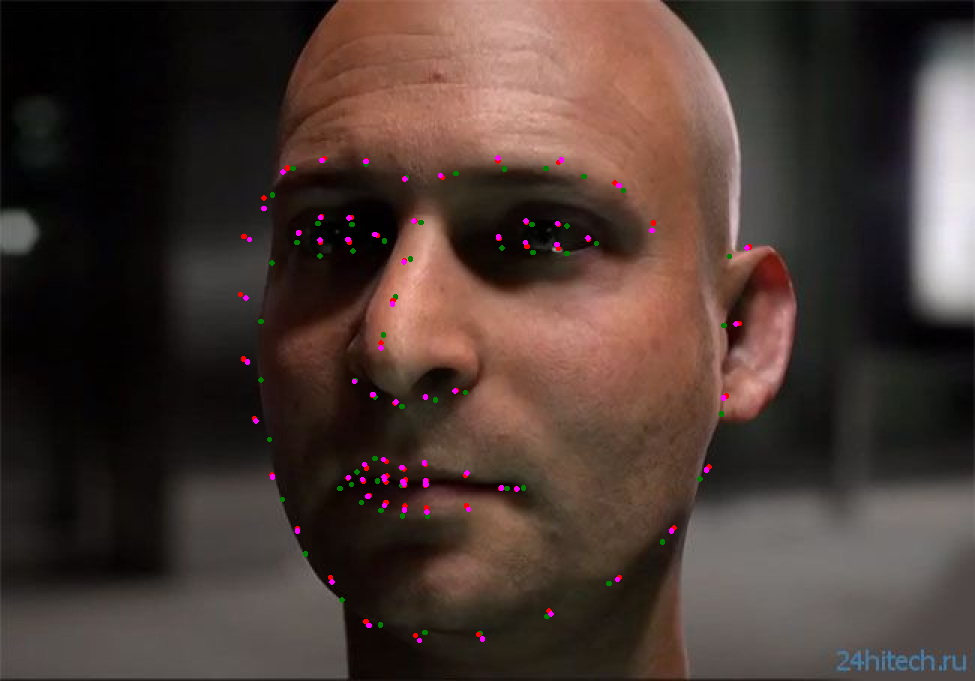

In [8]:
scale_ratio = 1.5
resized_dl = ResizedDataLoader(dl, scales=scale_ratio)

original_image, marks, _ = dl[4]
resized_image, resized_marks, _ = resized_dl[4]

original_predictions = model.predict_image(original_image)
resized_predictions = model.predict_image(resized_image)
draw_marks(
    resized_image, [resized_marks, original_predictions * scale_ratio, resized_predictions], ["green", "red", "magenta"]
)

In [ ]:
# TODO: missing resizin prediciton in order to compare against original dataset
# test_result = TestDiff(metric=NMEMean, threshold=1).run(model, blurred_dl, dataloader_ref=dl)
# test_result

### Coloring

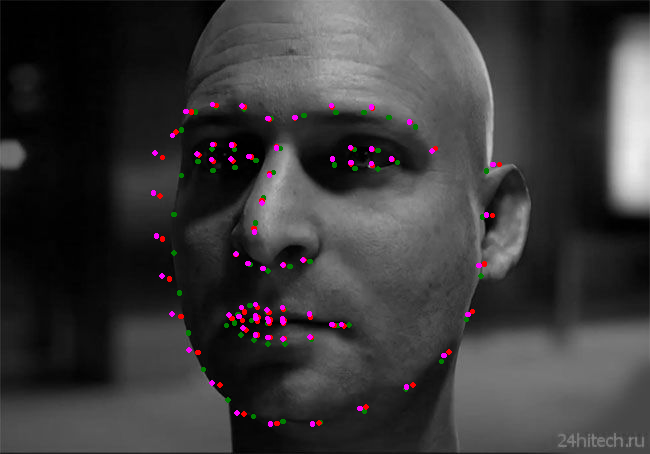

In [11]:
scale_ratio = 1.5
colored_dl = ColorDataLoader(dl)

original_image, marks, _ = dl[4]
colored_image, resized_marks, _ = colored_dl[4]

original_predictions = model.predict_image(original_image)
colored_predictions = model.predict_image(colored_image)
draw_marks(colored_image, [resized_marks, original_predictions, colored_predictions], ["green", "red", "magenta"])

In [12]:
test_result = TestDiff(metric=NMEMean, threshold=1).run(model, colored_dl, dataloader_ref=dl)
test_result

Test "NME_mean" succeeded
               Description: Mean of normalised mean Euclidean distances across images
               Metric: 0.0013 (threshold = 1)
               
               Prediction time: 0.88 s.